# <font color="#8333ff">TP : Pratiquez la régression linéaire multiple sur le jeu de données de l'ozone</font>

Appliquons la régression linéaire multiple à l'échantillon ozone.
Modélisons le pic d'ozone journalier en fonction de toutes les autres variables météorologiques.

## Importez les données

On importe les librairies qui nous permettront de mener à bien ce TP :

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels

On importe les données, puis utiliser la commande  lm  pour régresser maxO3 en fonction des autres variables de l'échantillon. (T9, T12, T15, Ne9, Ne12, Ne15, maxO3v)

In [31]:
#Florian ANDRE, 3B DIA

ozone = pd.read_csv("C:\\Users\\flori\\Downloads\\ozone.csv", sep=";", decimal=',')

X = ozone[['T9', 'T12', 'T15', 'Ne9', 'Ne12', 'Ne15', 'maxO3v']]
y = ozone['maxO3']
X = sm.add_constant(X)

# Créer le modèle de régression
reg_multi = sm.OLS(y, X).fit()

# Visualiser le résumé du modèle
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     45.68
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           6.06e-29
Time:                        20:09:41   Log-Likelihood:                -453.71
No. Observations:                 112   AIC:                             923.4
Df Residuals:                     104   BIC:                             945.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7055     13.109      0.969      0.3

Est ce que tous les paramètres sont significatifs ? (indice : p-value)

Quelle est la valeur de $R^{2}$ et $R^{2}$ ajusté ?

*Pourquoi est elle plus élevée qu'en régression linéaire simple ?*

## Retirez les variables non significatives

On va donc maintenant retirer les variables non significatives. 
--> indice : On commence par la moins significative est on compare avec la valeur $R^{2}$ précédente.

In [32]:
# Inclure toutes les variables
X = ozone[['T9', 'T12', 'T15', 'Ne9', 'Ne12', 'Ne15', 'maxO3v']]
X = sm.add_constant(X)

# Créer le modèle initial
reg_multi = sm.OLS(y, X).fit()

# Résumé pour la 1ère itération
print(reg_multi.summary())

# Après analyse des p-values, on retire 'Ne15' (la plus grande p-value)


                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     45.68
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           6.06e-29
Time:                        20:09:41   Log-Likelihood:                -453.71
No. Observations:                 112   AIC:                             923.4
Df Residuals:                     104   BIC:                             945.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7055     13.109      0.969      0.3

On l'enlève la variable non significative suivante ! (à base du nouveau summary())

In [33]:
# Retirer 'Ne15' (plus grande p-value)
X_reduced_1 = ozone[['T9', 'T12', 'T15', 'Ne9', 'Ne12', 'maxO3v']]
X_reduced_1 = sm.add_constant(X_reduced_1)

# Créer un nouveau modèle après avoir supprimé 'Ne15'
reg_multi_2 = sm.OLS(y, X_reduced_1).fit()

# Afficher le résumé du nouveau modèle pour voir les p-values
print(reg_multi_2.summary())

# Après analyse des p-values, nous retirons la prochaine variable avec la plus grande p-value
# Supposons que la prochaine variable soit 'Ne12'


                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     53.80
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           7.91e-30
Time:                        20:09:41   Log-Likelihood:                -453.71
No. Observations:                 112   AIC:                             921.4
Df Residuals:                     105   BIC:                             940.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8492     12.950      0.992      0.3

On l'enlève la variable non significative suivante ! (à base du nouveau summary())

In [34]:
# Retirer 'Ne12' (prochaine plus grande p-value)
X_reduced_2 = ozone[['T9', 'T12', 'T15', 'Ne9', 'maxO3v']]
X_reduced_2 = sm.add_constant(X_reduced_2)

# Créer un nouveau modèle après suppression de 'Ne12'
reg_multi_3 = sm.OLS(y, X_reduced_2).fit()

# Afficher le résumé du modèle pour voir les p-values
print(reg_multi_3.summary())

# Après analyse des p-values, nous retirons la prochaine variable avec la plus grande p-value
# Supposons que 'T9' soit la prochaine variable à retirer


                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     65.11
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           9.62e-31
Time:                        20:09:41   Log-Likelihood:                -453.75
No. Observations:                 112   AIC:                             919.5
Df Residuals:                     106   BIC:                             935.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2844     11.534      0.978      0.3

On l'enlève la variable non significative suivante ! (à base du nouveau summary())

In [35]:
# Retirer 'T9' (prochaine plus grande p-value)
X_reduced_3 = ozone[['T12', 'T15', 'Ne9', 'maxO3v']]
X_reduced_3 = sm.add_constant(X_reduced_3)

# Créer un nouveau modèle après suppression de 'T9'
reg_multi_4 = sm.OLS(y, X_reduced_3).fit()

# Afficher le résumé du modèle pour voir les p-values
print(reg_multi_4.summary())

# Si toutes les variables sont maintenant significatives (p < 0.05), c'est la version finale du modèle


                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     81.55
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           1.33e-31
Time:                        20:09:41   Log-Likelihood:                -454.06
No. Observations:                 112   AIC:                             918.1
Df Residuals:                     107   BIC:                             931.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1368     11.168      0.818      0.4

On remarque qu'à présent, tous les paramètres sont significatifs (sinon, vous avez mal choisi les variables à enlever). 

Quant au $R^{2}$, il vaut environ 0.75, tout comme le $R^{2}$ ajusté.

*Est ce qu'on peut donc utiliser ce modèle à des fins de prévision ?*

### Prediction :

Si l'on souhaite prévoir la concentration journalière en ozone, sachant que la température prévue à 12 h sera de 15 °C, que la valeur de Ne9 sera de 2, et que la concentration maxO3v de la veille vaut 100, alors quelle est la concentration en ozone ? indice : utiliser la fonction predict() du modèle de regression

In [36]:
a_prevoir = pd.DataFrame({'const': [1], 'T12': [15], 'T15': [0], 'Ne9': [2], 'maxO3v': [100]})

maxO3_prev = reg_multi_4.predict(a_prevoir)

print(f"Prédiction de la concentration en ozone : {round(maxO3_prev[0], 2)}")

Prédiction de la concentration en ozone : 73.7


## Testez la normalité des résidus

Si l'on veut tester la normalité des résidus, on peut créer un graphe (scatter plot) avec les vraies valeurs (y_truth) vs les prédictions ou les vraies valeurs (y_truth) vs les erreurs (résidus).

In [37]:
residus = reg_multi.resid

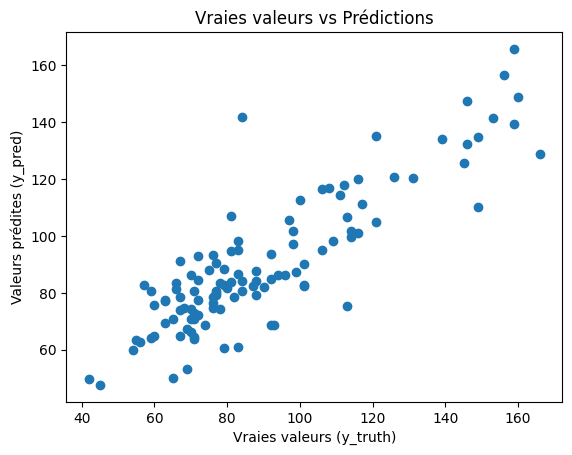

In [38]:
## PLOT THE Y_TRUTH VS PREDICTIONS ( PREDICTION OF THE TRAINING DATASET )
plt.scatter(y, reg_multi.fittedvalues)
plt.xlabel('Vraies valeurs (y_truth)')
plt.ylabel('Valeurs prédites (y_pred)')
plt.title('Vraies valeurs vs Prédictions')
plt.show()


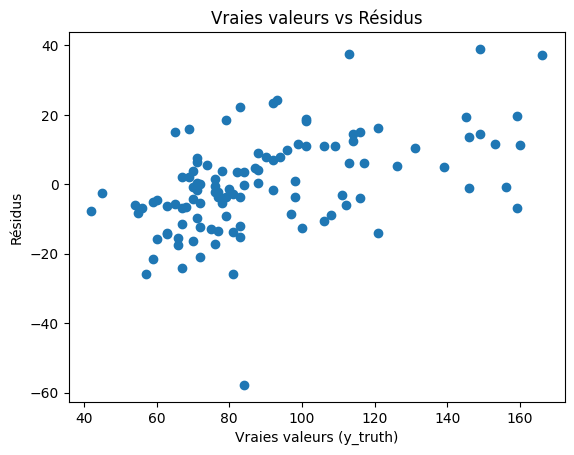

In [39]:
## PLOT THE Y_TRUTH VS ERRORS 
plt.scatter(y, residus)
plt.xlabel('Vraies valeurs (y_truth)')
plt.ylabel('Résidus')
plt.title('Vraies valeurs vs Résidus')
plt.show()


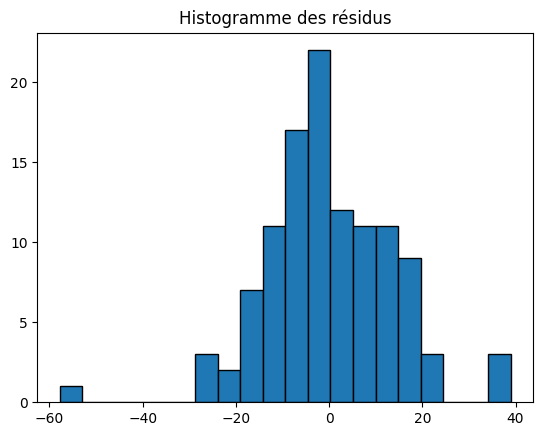

In [40]:
## PLOT A HISTOGRAM OF RESIDUALS
plt.hist(residus, bins=20, edgecolor='k')
plt.title('Histogramme des résidus')
plt.show()
